In [1]:
import numpy as np
import pandas as pd

In [84]:
netflix_df = pd.read_csv("data.csv")
netflix_df_copy = netflix_df

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
categories = []
for i in range(len(netflix_df)):
    categories.extend(netflix_df.listed_in.iloc[i].split(','))

for i in range(len(categories)):
    categories[i] = categories[i].strip()
    
categories_dict = {}
for i in categories:
    categories_dict[i] = categories.count(i)
    
categories_dict = dict(sorted(categories_dict.items(), key=lambda entry: entry[1], reverse=True))

In [5]:
categories

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

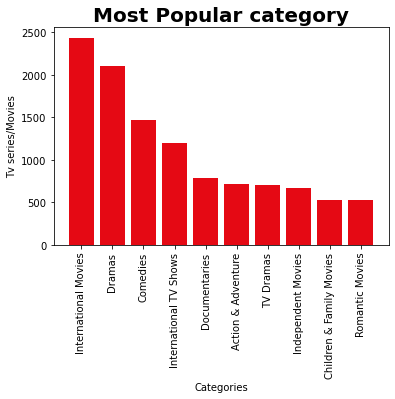

In [6]:
import matplotlib.pyplot as plt

height = list(categories_dict.values())[:10]
bars = list(categories_dict.keys())[:10]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height,color = "#E50914")
plt.xlabel('Categories') 
plt.xticks(y_pos, bars)
plt.ylabel('Tv series/Movies') 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

plt.xticks(rotation=90)

# Show graphic
plt.show()

In [7]:
import datetime

def get_month(string_time):
    try:
        clean = string_time.strip()
        parsed = datetime.datetime.strptime(clean, '%B %d, %Y')
        #print(parsed)
        return int(parsed.month)

    except Exception as e:
        return e

In [8]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [39]:
netflix_df['added_month'] = netflix_df['date_added'].apply(
    get_month)
with_year = netflix_df[netflix_df['added_month'] != 0]
with_year = with_year.sort_values(by=['added_month'])

#with_year
#netflix_df['added_month']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[833, 785, 757, 738, 669, 619, 618, 601, 600, 543, 542, 472]


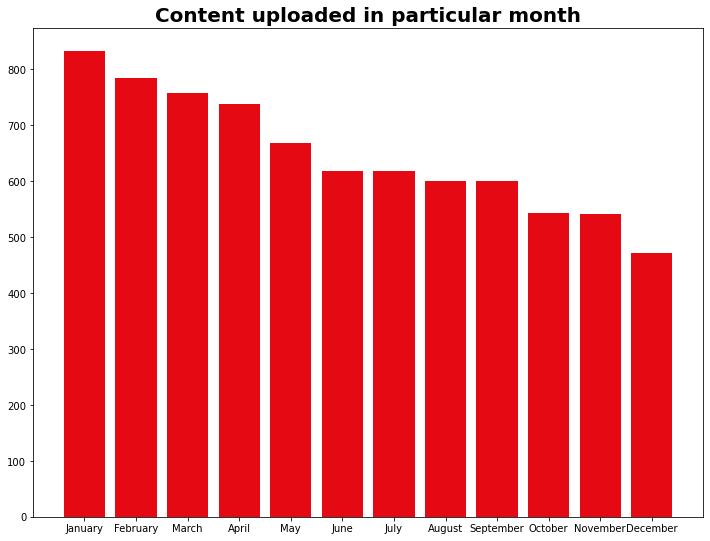

In [40]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

bars = list(with_year.added_month.unique()[:12])
height = list(with_year.added_month.value_counts()[:12])
print(bars)
print(height)

plt.bar(bars, height, color = "#E50914" )
plt.xticks(bars, ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
#plt.xticks.labels = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#bars = list()

plt.title('Content uploaded in particular month',fontsize=20, fontweight='bold') 
plt.show()

In [11]:
#netflix_df['date_added']
netflix_df['pd_date'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.sort_values(by='pd_date', inplace=True)
netflix_df.set_index(['pd_date'], inplace=True)

In [28]:
import math

month_array = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
netflix_df['date_year'] = netflix_df.index.year
netflix_df['date_month'] = netflix_df.index.month
netflix_df.dropna(subset = ["date_month"], inplace=True)
netflix_df['date_month'] = netflix_df['date_month'].apply(lambda current_data: month_array[int(current_data) - 1])
netflix_df['one'] = 1

In [64]:
#print(netflix_df.head())

netflix_df_filtered = netflix_df[netflix_df['date_year'].between(2017, 2020)]
netflix_df_filtered = netflix_df_filtered.sort_values(by=['added_month'])

netflix_pivot = pd.pivot_table(
netflix_df_filtered,
values = 'one', index='date_year', columns='date_month', aggfunc=np.sum)
netflix_pivot = netflix_pivot.reindex(month_array, axis=1)
netflix_pivot = netflix_pivot.T
netflix_pivot.head()

date_year,2017,2018,2019,2020
date_month,,,,
January,72,130,162,228
February,84,88,159,117
March,140,175,179,152
April,95,118,171,188
May,88,101,159,173


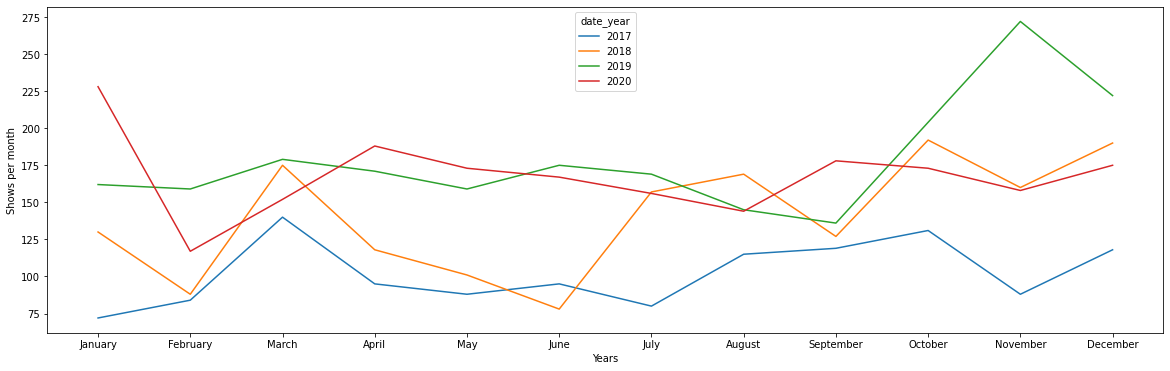

In [81]:
ax = netflix_pivot.plot(kind="line")
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

plt.xticks( np.arange(12), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Shows per month")

plt.show()

In [93]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158006 sha256=87961925fb9c0c4c72ec500cf4104529af5949008cfdcba77b1f46cb1837dfe3
  Stored in directory: /Users/divan/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [121]:
netflix_df_copy.dropna(subset = ["description"], inplace=True)
all_descriptions = " ".join(description for description in netflix_df_copy.description)
all_descriptions = all_actors.replace(',', '')

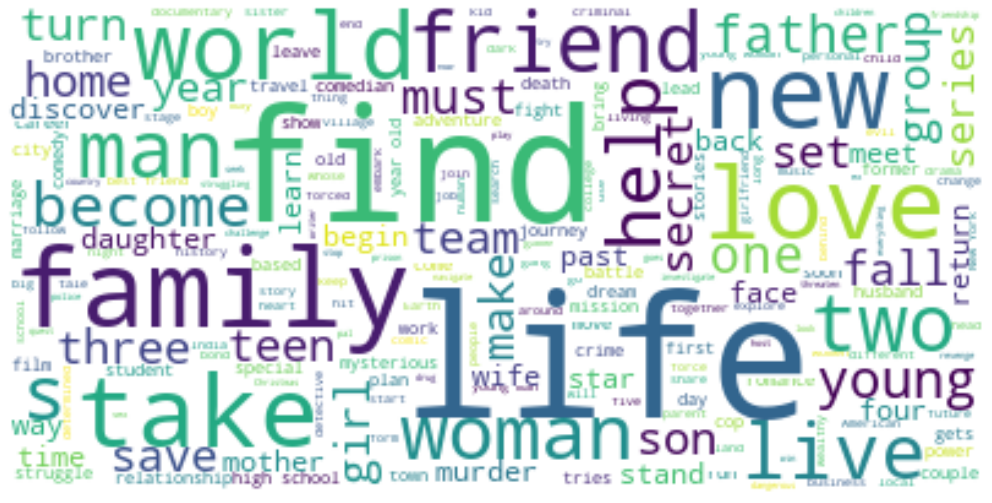

In [124]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="white").generate(all_descriptions)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

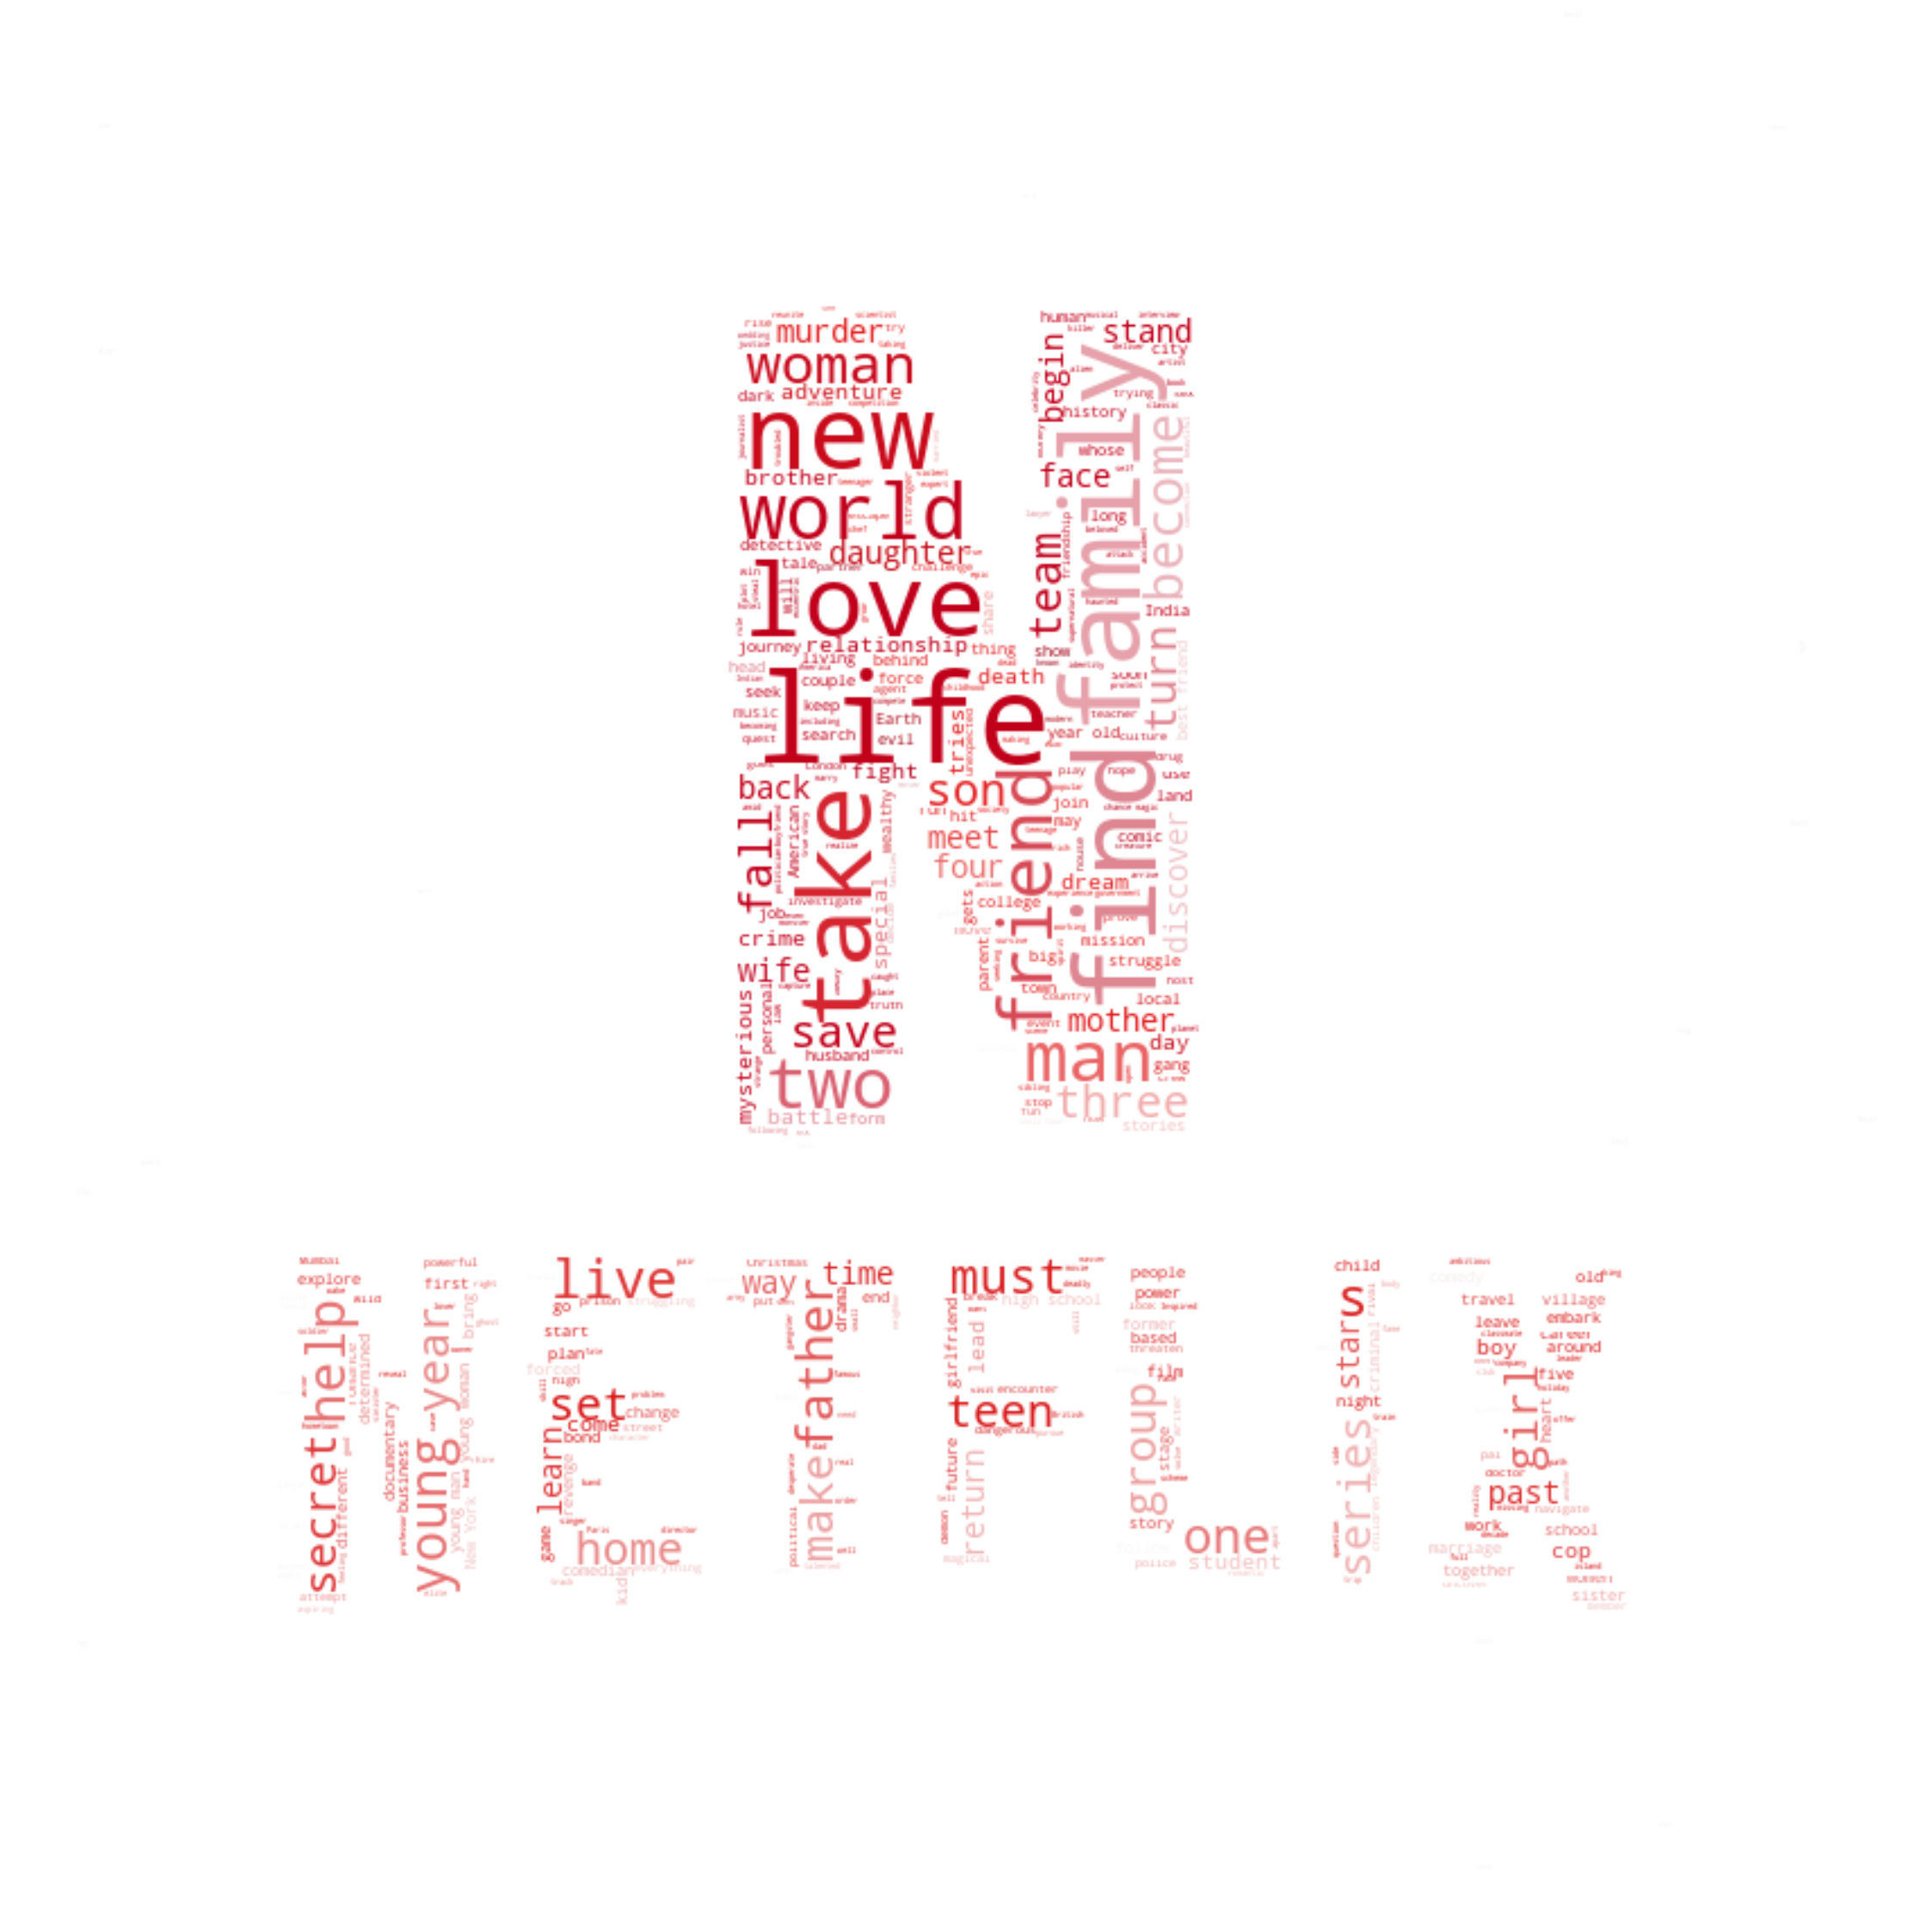

In [125]:
from PIL import Image

mask = np.array(Image.open('netflix_1.png'))
wordcloud_image = WordCloud(background_color="white", mode="RGBA", max_words=2000, mask=mask, width=5200, height=3600).generate(all_descriptions)

image_generator = ImageColorGenerator(mask)
plt.figure(figsize=[40,50])
plt.axis("off")
plt.imshow(wordcloud_image.recolor(color_func=image_generator), interpolation="bilinear")